### The Bisection Method: A Simple & Robust Root-Finding Algorithm

### The Core Idea: The Intermediate Value Theorem

The bisection method is beautifully simple because it relies on a very intuitive mathematical guarantee: the **Intermediate Value Theorem (IVT)**.

The IVT states that if you have a continuous function $f(x)$ on an interval $[a, b]$, and the values $f(a)$ and $f(b)$ have **opposite signs**, then there must be at least one point $c$ between $a$ and $b$ where $f(c) = 0$.

Think about it: if you have to draw a continuous line from a point below the x-axis to a point above it, you *must* cross the x-axis somewhere. That crossing point is our root. The bisection method's entire strategy is to systematically narrow down the location of that crossing point.

Mathematically, the condition is that $f(a) \cdot f(b) < 0$.

-----



### The Algorithm: Halve and Conquer

The bisection method is a "divide and conquer" algorithm. It works just like looking up a name in a phone book or a word in a dictionary.

Here are the steps:

1.  **Bracket the Root:** Choose a starting interval $[a, b]$ where you know a root exists. You verify this by checking that $f(a)$ and $f(b)$ have opposite signs.
2.  **Find the Midpoint:** Calculate the middle of the interval, which we'll call $m$.
    $$m = \frac{a+b}{2}$$
3.  **Evaluate:** Calculate the value of the function at the midpoint, $f(m)$.
4.  **Update the Interval:** Now, we have three possibilities:
      * If $f(m) = 0$, you've found the root\! (This is rare in practice).
      * If $f(m)$ has the same sign as $f(a)$, it means the root must be in the *other* half of the interval. So, we discard the first half by setting our new interval to $[m, b]$.
      * If $f(m)$ has the same sign as $f(b)$, the root must be in the *first* half. We discard the second half by setting our new interval to $[a, m]$.
5.  **Repeat:** Go back to step 2 with your new, smaller interval. We repeat this process until the interval $[a, b]$ becomes smaller than some predefined tolerance, $\\epsilon$. At that point, the midpoint is a very good approximation of the root.

Each iteration **halves** the size of the interval where the root could be, guaranteeing that we will eventually converge on the answer.

-----



### Pros and Cons

#### Advantages

  * **Robustness:** The bisection method is **guaranteed to converge** to a root if the initial interval is chosen correctly. It will never diverge or fail.
  * **Simplicity:** The algorithm is very easy to understand and implement.
  * **Predictable:** You can calculate in advance exactly how many iterations it will take to reach a desired tolerance.

#### Disadvantages

  * **Slow Convergence:** The method converges **linearly**, which is considered slow. Each iteration only reduces the error by a factor of two. Other methods, like Newton-Raphson, can converge much faster (quadratically), but they are not guaranteed to work.
  * **Requires a Bracket:** You must find an initial interval $[a, b]$ where $f(a)$ and $f(b)$ have opposite signs. For some functions, finding this bracket can be a challenge in itself.

In summary, the bisection method is a reliable workhorse. While it may not be the fastest, its simplicity and guaranteed convergence make it an excellent tool to have in your numerical methods toolbox.

-----

### Example & Python Implementation

Let's find the root of the function $f(x) = x^3 - x - 2$ using Python.

First, we need to find an initial bracket.

  * Let's try $a=1$: $f(1) = 1^3 - 1 - 2 = -2$
  * Let's try $b=2$: $f(2) = 2^3 - 2 - 2 = 4$

Since $f(1)$ is negative and $f(2)$ is positive, we know a root exists somewhere in the interval $[1, 2]$.

Here's the Python code that implements the bisection algorithm and then visualizes the result. We'll use `numpy` for efficient calculations and `matplotlib` for plotting.


In [3]:
#load all the necessary libraries
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [4]:

def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    """
    Finds a root of the function f within the interval [a, b]
    using the bisection method.

    Args:
        f (function): The function for which to find a root.
        a (float): The start of the interval.
        b (float): The end of the interval.
        tol (float): The tolerance for the stopping condition.
        max_iter (int): The maximum number of iterations.

    Returns:
        float: The approximate root, or None if the method fails.
    """
    # Check if a root is guaranteed to exist in the interval
    if f(a) * f(b) >= 0:
        print("Bisection method fails: f(a) and f(b) must have opposite signs.")
        return None

    iteration = 0
    while (b - a) / 2.0 > tol and iteration < max_iter:
        # Calculate the midpoint
        m = (a + b) / 2.0
        
        # Print the current state for demonstration
        print(f"Iter {iteration+1:2d}: a={a:.6f}, b={b:.6f}, m={m:.6f}, f(m)={f(m):.6f}")

        # Update the interval
        if f(m) == 0:
            # Found the exact root
            return m
        elif f(a) * f(m) < 0:
            # Root is in the left half
            b = m
        else:
            # Root is in the right half
            a = m
        
        iteration += 1

    # Return the midpoint of the final interval as the approximation
    return (a + b) / 2.0


In [6]:

# --- Let's run the example ---

# 1. Define our function
def my_function(x):
    return x**3 - x - 2


In [7]:

# 2. Set the initial interval and tolerance
a_start = 1.0
b_start = 2.0
tolerance = 1e-7


In [8]:

# 3. Call the bisection method
root = bisection_method(my_function, a_start, b_start, tol=tolerance)


Iter  1: a=1.000000, b=2.000000, m=1.500000, f(m)=-0.125000
Iter  2: a=1.500000, b=2.000000, m=1.750000, f(m)=1.609375
Iter  3: a=1.500000, b=1.750000, m=1.625000, f(m)=0.666016
Iter  4: a=1.500000, b=1.625000, m=1.562500, f(m)=0.252197
Iter  5: a=1.500000, b=1.562500, m=1.531250, f(m)=0.059113
Iter  6: a=1.500000, b=1.531250, m=1.515625, f(m)=-0.034054
Iter  7: a=1.515625, b=1.531250, m=1.523438, f(m)=0.012250
Iter  8: a=1.515625, b=1.523438, m=1.519531, f(m)=-0.010971
Iter  9: a=1.519531, b=1.523438, m=1.521484, f(m)=0.000622
Iter 10: a=1.519531, b=1.521484, m=1.520508, f(m)=-0.005179
Iter 11: a=1.520508, b=1.521484, m=1.520996, f(m)=-0.002279
Iter 12: a=1.520996, b=1.521484, m=1.521240, f(m)=-0.000829
Iter 13: a=1.521240, b=1.521484, m=1.521362, f(m)=-0.000103
Iter 14: a=1.521362, b=1.521484, m=1.521423, f(m)=0.000259
Iter 15: a=1.521362, b=1.521423, m=1.521393, f(m)=0.000078
Iter 16: a=1.521362, b=1.521393, m=1.521378, f(m)=-0.000013
Iter 17: a=1.521378, b=1.521393, m=1.521385, f(m


Found root at: x = 1.5213796
   Value of f(x) at root: f(1.5213796) = -0.0000003


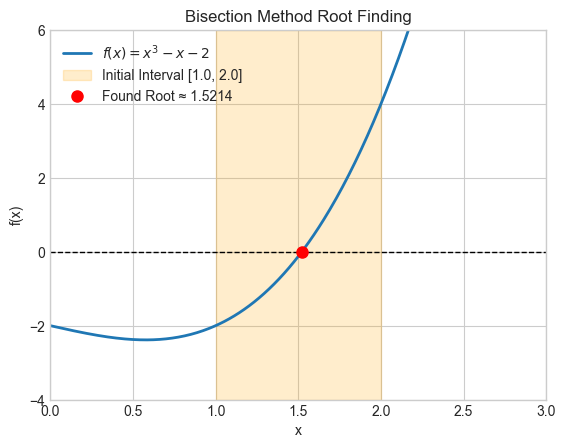

In [9]:

print(f"\nFound root at: x = {root:.7f}")
print(f"   Value of f(x) at root: f({root:.7f}) = {my_function(root):.7f}")

# 4. Plot the function and the root
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots()

x_vals = np.linspace(0, 3, 400)
y_vals = my_function(x_vals)

ax.plot(x_vals, y_vals, label='$f(x) = x^3 - x - 2$', lw=2)
ax.axhline(0, color='black', linestyle='--', lw=1) # The x-axis

# Highlight the initial interval
ax.axvspan(a_start, b_start, alpha=0.2, color='orange', label=f'Initial Interval [{a_start}, {b_start}]')

# Mark the found root
ax.plot(root, my_function(root), 'ro', markersize=8, label=f'Found Root ≈ {root:.4f}')

ax.set_title("Bisection Method Root Finding")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()
ax.set_ylim(-4, 6)
ax.set_xlim(0, 3)

plt.show()

-----

### Exercise 1: Find root for $x = 5 \cos(x)$ using Bisection Method

Implement the bisection method to find the root of the equation $x = 5 \cos(x)$. Answer the following questions:

- What is your function $f(x)$ to be used in bisection method?
- What is/are your initial brackets? How did you choose it?
- What is your tolerance?
- What is/are your roots? How many roots are there?
- What is your accuracy?
- What is the difference between accuracy and tolerance?
- How many iterations did it take to converge?

-----

### Exercise 2: Does the bisection method work for $f(x) = x^2$? 

Why or why not? Explain. If it works, try to find the root using this method.
